# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

## Student Name: Derek Graves

## GitHub Repo: https://github.com/dgraves4/web-scraping

Perform the tasks described in the Markdown cells below. When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (.py), then import and run the appropriate code to answer the question.

In [1]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests 
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package            Version
------------------ -----------
annotated-types    0.6.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
colorama           0.4.6
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
en-core-web-sm     3.7.1
executing          2.0.1
fonttools          4.51.0
html5lib           1.1
idna               3.6
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.4.0
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.6
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk               3.8.1
numpy   

### Question 1
Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

### Question 1 Response: 

In [2]:
# The URL of the article
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the web page
response = requests.get(url)

# Use BeautifulSoup to parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the div that contains the article text
article_div = soup.find('div', class_='entry-content')

# Extract all paragraph texts within the article div
article_paragraphs = article_div.find_all('p')
article_text = ' '.join(paragraph.get_text() for paragraph in article_paragraphs)

# Serialize the extracted article text to a .pkl file
with open('article_content_text.pkl', 'wb') as file:
    pickle.dump(article_text, file)

print("The article's text content has been saved to 'article_content_text.pkl'")



The article's text content has been saved to 'article_content_text.pkl'


### Question 2
Read in your article's html source from the file you created in question 1 and print it's text (use .get_text())

###  Question 2 Response: 

In [3]:
# Load the article text from the .pkl file
with open('article_content_text.pkl', 'rb') as file:
    article_text = pickle.load(file)

# Print the entire text
print(article_text)


When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out. Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!  The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific spot quite some distance away. Thankfully for our eyes, laser headlights don’t work in this way at all. Instead, laser headlights consist of one or more solid state laser diode

### Question 3
Load the article text into a trained spaCy pipeline, and determine the 5 most frequent tokens (converted to lower case). Print the common tokens with an appropriate label. Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

### Question 3 Response:

In [4]:
# Load the trained spaCy pipeline
nlp = spacy.load('en_core_web_sm')

# Assuming 'article_text' contains your article text
# Process the text with spaCy
doc = nlp(article_text)

# Filter out punctuation, whitespace, and stopwords
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]

# Count the tokens and get all frequencies sorted
token_freq = Counter(tokens)
all_tokens_sorted = token_freq.most_common()

# Print specifically the top 5 tokens
print("Top 5 Most Common Tokens and Frequencies:")
for token, freq in all_tokens_sorted[:5]:  # Just the top 5
    print(f"Token: {token}, Frequency: {freq}")

# Then print all tokens, starting with the top 5, for completeness
print("All Tokens and Frequencies (Including Top 5):")
for token, freq in all_tokens_sorted:  # This includes the top 5 as well
    print(f"Token: {token}, Frequency: {freq}")


Top 5 Most Common Tokens and Frequencies:
Token: laser, Frequency: 22
Token: headlights, Frequency: 15
Token: technology, Frequency: 9
Token: led, Frequency: 9
Token: beam, Frequency: 7
All Tokens and Frequencies (Including Top 5):
Token: laser, Frequency: 22
Token: headlights, Frequency: 15
Token: technology, Frequency: 9
Token: led, Frequency: 9
Token: beam, Frequency: 7
Token: light, Frequency: 7
Token: high, Frequency: 7
Token: automotive, Frequency: 6
Token: headlight, Frequency: 6
Token: come, Frequency: 5
Token: leds, Frequency: 5
Token: lasers, Frequency: 5
Token: beams, Frequency: 5
Token: aftermarket, Frequency: 5
Token: lighting, Frequency: 4
Token: way, Frequency: 4
Token: bmw, Frequency: 4
Token: mind, Frequency: 3
Token: efficiency, Frequency: 3
Token: designs, Frequency: 3
Token: simple, Frequency: 3
Token: new, Frequency: 3
Token: inside, Frequency: 3
Token: phosphor, Frequency: 3
Token: diode, Frequency: 3
Token: end, Frequency: 3
Token: performance, Frequency: 3
Token

### Question 4
Load the article text into a trained spaCy pipeline, and determine the 5 most frequent lemmas (converted to lower case). Print the common lemmas with an appropriate label. Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

### Question 4 Response: 

In [5]:
# Load the trained spaCy pipeline
nlp = spacy.load('en_core_web_sm')

# Assuming 'article_text' contains the article text loaded from the previous steps
# Process the text with spaCy
doc = nlp(article_text)

# Filter out punctuation, whitespace, and stopwords, then lemmatize
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]

# Count the lemmas and get all frequencies sorted
lemma_freq = Counter(lemmas)
all_lemmas_sorted = lemma_freq.most_common()

# Print specifically the top 5 lemmas
print("Top 5 Most Common Lemmas and Frequencies:")
for lemma, freq in all_lemmas_sorted[:5]:  # Just the top 5
    print(f"Lemma: {lemma}, Frequency: {freq}")

# Then print all lemmas, starting with the top 5, for completeness
print("All Lemmas and Frequencies (Including Top 5):")
for lemma, freq in all_lemmas_sorted:  # This includes the top 5 as well
    print(f"Lemma: {lemma}, Frequency: {freq}")



Top 5 Most Common Lemmas and Frequencies:
Lemma: laser, Frequency: 27
Lemma: headlight, Frequency: 21
Lemma: beam, Frequency: 12
Lemma: technology, Frequency: 9
Lemma: light, Frequency: 8
All Lemmas and Frequencies (Including Top 5):
Lemma: laser, Frequency: 27
Lemma: headlight, Frequency: 21
Lemma: beam, Frequency: 12
Lemma: technology, Frequency: 9
Lemma: light, Frequency: 8
Lemma: lead, Frequency: 8
Lemma: high, Frequency: 8
Lemma: come, Frequency: 7
Lemma: automotive, Frequency: 6
Lemma: led, Frequency: 6
Lemma: design, Frequency: 5
Lemma: diode, Frequency: 5
Lemma: aftermarket, Frequency: 5
Lemma: lighting, Frequency: 4
Lemma: way, Frequency: 4
Lemma: bmw, Frequency: 4
Lemma: low, Frequency: 4
Lemma: thing, Frequency: 3
Lemma: mind, Frequency: 3
Lemma: efficiency, Frequency: 3
Lemma: day, Frequency: 3
Lemma: simple, Frequency: 3
Lemma: new, Frequency: 3
Lemma: inside, Frequency: 3
Lemma: phosphor, Frequency: 3
Lemma: vehicle, Frequency: 3
Lemma: temperature, Frequency: 3
Lemma: en

### Question 5
Define the following methods:
- score_sentence_by_token(sentence, interesting_token) that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
- score_sentence_by_lemma(sentence, interesting_lemmas) that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence

You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well). Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

### Question 5 Response:

In [6]:
# Load the trained spaCy pipeline
nlp = spacy.load('en_core_web_sm')

# Define the scoring function for tokens
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
    matches = sum(token in interesting_tokens for token in tokens)
    return matches / len(tokens) if tokens else 0

# Define the scoring function for lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
    matches = sum(lemma in interesting_lemmas for lemma in lemmas)
    return matches / len(lemmas) if lemmas else 0

# Load the article text from the .pkl file
with open('article_content_text.pkl', 'rb') as file:
    article_text = pickle.load(file)

# Process the loaded article text with spaCy
doc = nlp(article_text)

# Extract the first sentence
first_sentence = next(doc.sents).text

# Assuming these lists are based on your earlier analysis from Question 3 and 4
interesting_tokens = ["laser", "headlights", "technology", "headlight", "led"]
interesting_lemmas = ["laser", "headlight", "technology", "light", "car"]

# Calculate and print the scores for the first sentence
token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

print(f"Token Score of the first sentence: {token_score}")
print(f"Lemma Score of the first sentence: {lemma_score}")





Token Score of the first sentence: 0.2
Lemma Score of the first sentence: 0.2


### Question 6
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

### Question 6 Response:

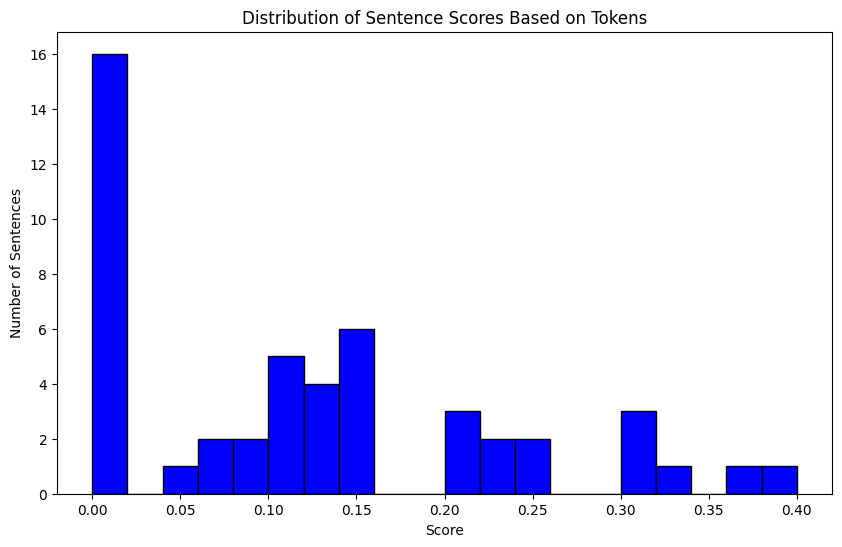

'\nThe most common range of scores seems to be between 0.1 and 0.15, with a few sentences having scores above 0.2. \nThis indicates that most sentences contain a small number of interesting tokens, with a few sentences containing more of these tokens. \nThe distribution is skewed to the right, with a long tail of sentences having higher scores.\n'

In [7]:
# Ensure spaCy is loaded and the article text is processed
nlp = spacy.load('en_core_web_sm')
doc = nlp(article_text)

# Define or reuse score_sentence_by_token function
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
    matches = sum(token in interesting_tokens for token in tokens)
    return matches / len(tokens) if tokens else 0

# Interesting tokens based on earlier analysis
interesting_tokens = ["laser", "headlights", "technology", "headlight", "led"]

# Calculate scores for every sentence
sentence_scores = [score_sentence_by_token(sent.text, interesting_tokens) for sent in doc.sents]

# Plot the histogram of sentence scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Sentence Scores Based on Tokens')
plt.xlabel('Score')
plt.ylabel('Number of Sentences')
plt.show()


"""
The most common range of scores seems to be between 0.1 and 0.15, with a few sentences having scores above 0.2. 
This indicates that most sentences contain a small number of interesting tokens, with a few sentences containing more of these tokens. 
The distribution is skewed to the right, with a long tail of sentences having higher scores.
"""


### Question 7
Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?


### Question 7 Response: 

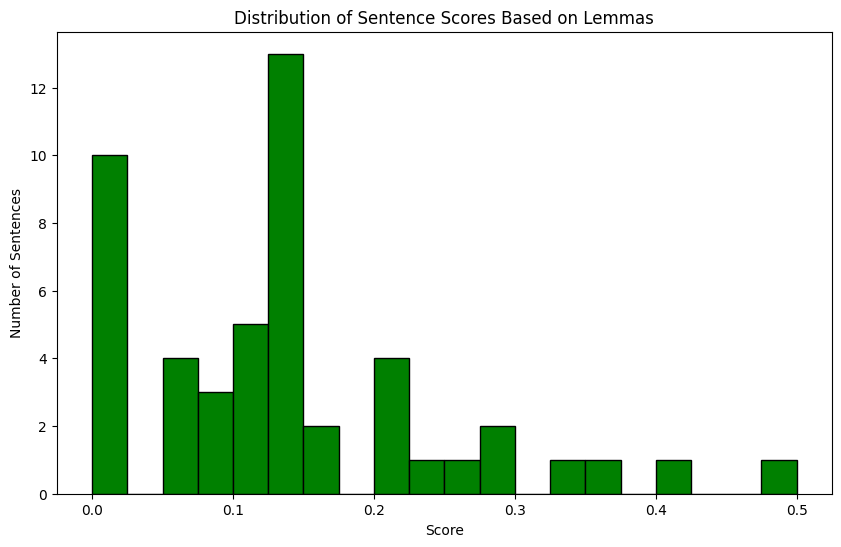

'\n0.0 to 0.25 seems to be the most common range of scores, with a few sentences having scores above 0.25. \nThis indicates that most sentences contain a small number of interesting lemmas, with a few sentences containing more of these lemmas. \nThe distribution is skewed to the right, with a long tail of sentences having higher scores.\nThis distribution is similar to that based on tokens, but the scores are generally lower due to the lemmatization process.\n'

In [8]:
# Ensure spaCy is loaded and the article text is processed
nlp = spacy.load('en_core_web_sm')
doc = nlp(article_text)

# Define or reuse score_sentence_by_lemma function
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
    matches = sum(lemma in interesting_lemmas for lemma in lemmas)
    return matches / len(lemmas) if lemmas else 0

# Interesting lemmas based on earlier analysis
interesting_lemmas = ["laser", "headlight", "technology", "light", "car"]

# Calculate scores for every sentence
sentence_lemma_scores = [score_sentence_by_lemma(sent.text, interesting_lemmas) for sent in doc.sents]

# Plot the histogram of sentence lemma scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_lemma_scores, bins=20, color='green', edgecolor='black')
plt.title('Distribution of Sentence Scores Based on Lemmas')
plt.xlabel('Score')
plt.ylabel('Number of Sentences')
plt.show()

'''
0.0 to 0.25 seems to be the most common range of scores, with a few sentences having scores above 0.25. 
This indicates that most sentences contain a small number of interesting lemmas, with a few sentences containing more of these lemmas. 
The distribution is skewed to the right, with a long tail of sentences having higher scores.
This distribution is similar to that based on tokens, but the scores are generally lower due to the lemmatization process.
'''

### Question 8
Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words? How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

### Question 8 response: 
To consider only nouns as interesting words, the following tokens and lemmas would be omitted from the lists generated in questions 3 and 4: Only the tokens "headlights" and "technology" would be included, as they are the only nouns in the top 5 token list.
For lemmas: Only the lemmas "headlight" and "technology" would be included, as they are the only nouns in the top 5 lemma list.

To change the code to consider only nouns, we would want to change our conditions for each to match something like the following: 

```bash
tokens = [token.text.lower() for token in doc if token.pos_ == 'NOUN' and not token.is_punct and not token.is_space and not token.is_stop]
lemmas = [token.lemma_.lower() for token in doc if token.pos_ == 'NOUN' and not token.is_punct and not token.is_space and not token.is_stop]
```

